# Fundamentals GNN for HEP (particle physics) for Quark/Gluon Jet classification  + Task categorization in context of GNN
-----------------



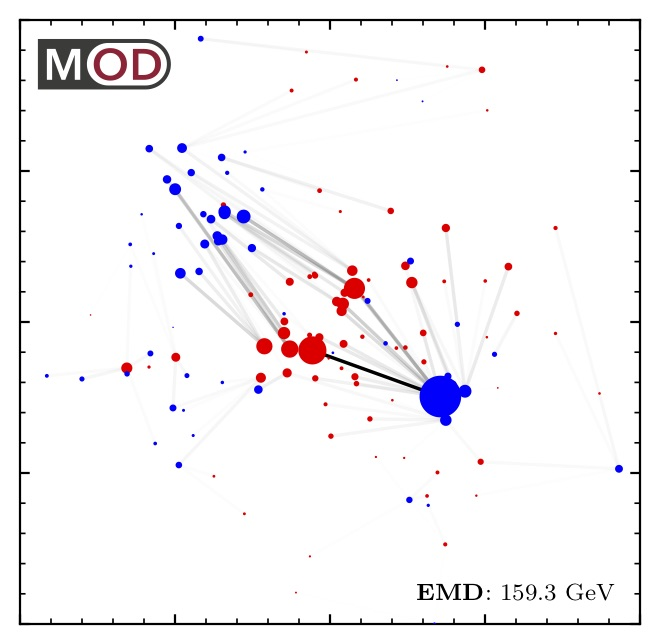

# 1. Fundamentals GNN
- Literature overview GNN: https://github.com/naganandy/
graph-based-deep-learning-literature

-   Best overview papers:
https://arxiv.org/pdf/1806.01261.pdf, 
 https://arxiv.org/pdf/2007.13681.pdf including fundametals of GNN  and geometric learning

- Best Task related paper = Energy Flow Networks (from dataset link adapting DeepSet GNN for particle physics): 
https://arxiv.org/pdf/1810.05165.pdf

- Jet information / Dataset: https://arxiv.org/pdf/1704.08249.pdf


 # 2. Dataset (get + investigate) + + Task Categorisation
 from https://zenodo.org/record/3164691#.Xk1VwS2B1QI

-> *use* EnergyFlow Python package 
(https://energyflow.network/docs/datasets/#quark-and-gluon-jets) [energyflow.qg_jets.load(num_data=100000, pad=True, ncol=4, generator='pythia',
                        with_bc=False, cache_dir='~/.energyflow')]

-   ""The  first  step  is  to  decide  what  function  one  wants  to  learn  with  the  GNN.  In  someapplications  this  is  trivial  -  for  example  jet,  event  or  particle  classification.   In  thosecases a GNN is used to learn some representation of the node or the entire graph/setand a standard classifier is trained on that representation.""

## --> GNN for Graph Classification

Visualization from HSP-SL (Hierarchical Graph Pooling with Structure Learning) paper:
https://arxiv.org/pdf/1911.05954v3.pdf


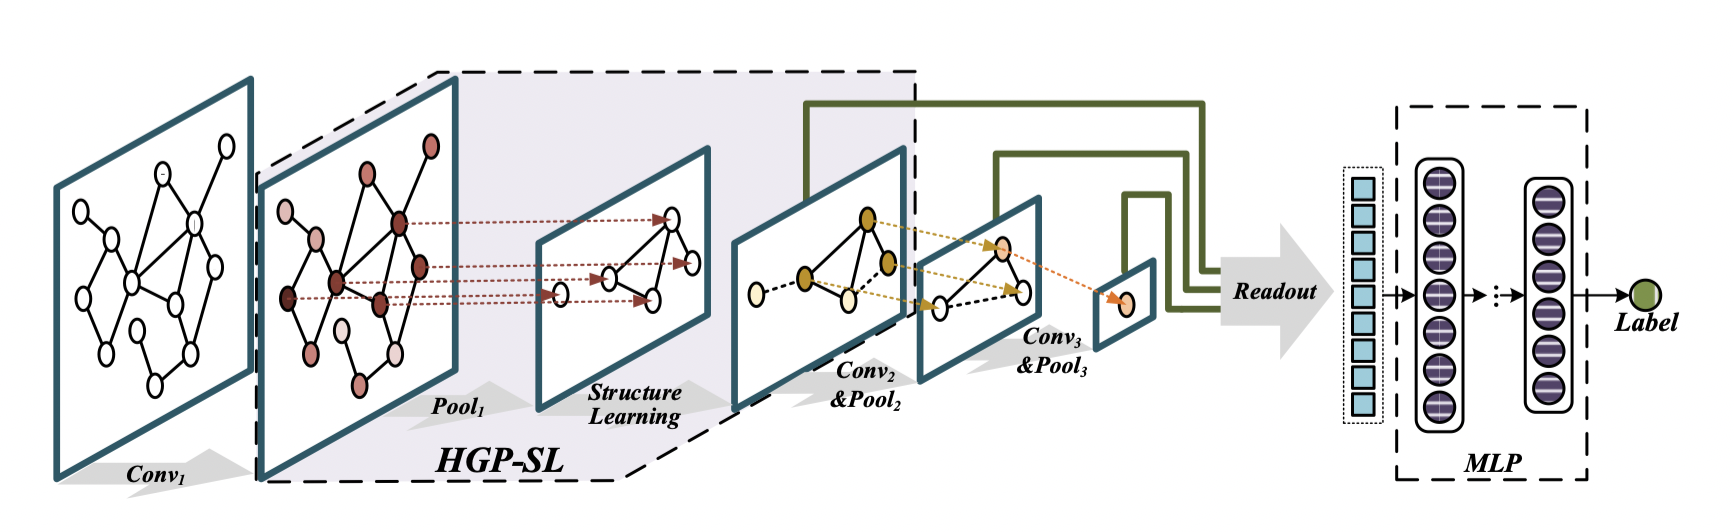

## 2. Available Models and repos (from paper):

- Benchmarks/ Paper
- Paperswithcode on Graph Classification with d
dataset for binary classification (= Quark/Gluon Jet tagging)


## --> PyTorch_geometric for fast GNN implementation and tests 

##--> EnergyFlow [Python package containing a suite of particle physics tools with feature for particle classification: 
- feature:
Particle Flow Networks: PFNs are general models designed for learning from collider events as unordered, variable-length sets of particles, based on the Deep Sets framework. EnergyFlow contains customizable Keras implementations of PFNs. Available from version 0.10.0 onward. 
 
- (further packages e.g (energyflow [Python package containing a suite of particle physics tools], spektral [keras based], stellargraph) and repos e.g. (windows TF-GNN package) for GNNs below

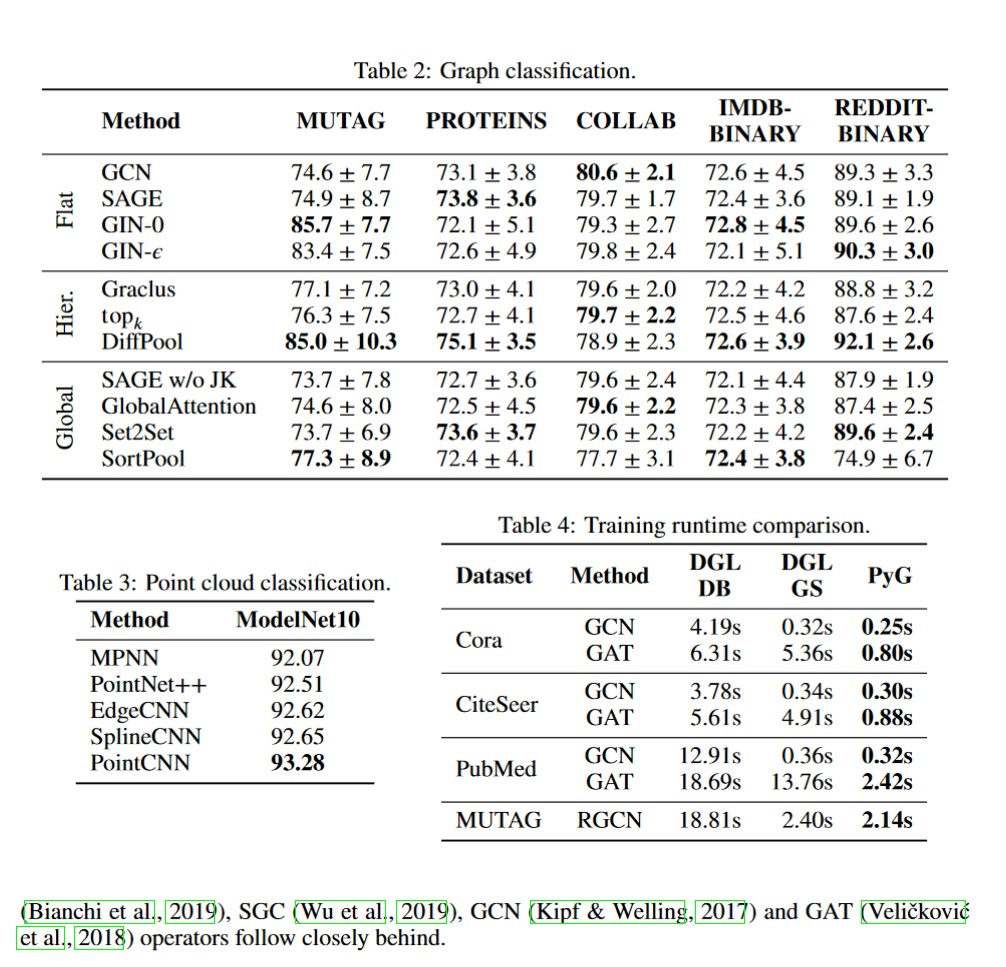

# Performance measurement (from https://arxiv.org/pdf/1612.01551.pdf)

We  measure  the  discrimination  power  of  an  observable  by  the  lowest  achievable  gluon acceptance efficiency εg at a given quark acceptance efficiency εq.  The performance can be visualized  through  a  receiver  operating  characteristic  (ROC)  curve,  which  plots  1−εg as a function of εq.  An alternative visualization is the significance improvement characteristic(SIC)εq/√εg.  A SIC curve has the advantage of being closely connected to the improvementin  signal  over  background  discrimination  power  in  a  collider  physics  application,  and  alsoexhibits a nontrivial maximum (at someεq) which gives an unbiased measure of the relativeperformance of different discriminants 

# CODING:

In [ ]:
!pip install energyflow
!pip install torch
!pip install dgl
!pip install stellargraph
!pip install spektral

In [ ]:
import os
import numpy as np
import energyflow
from energyflow.archs import *
import pandas as pd
import torch
import stellargraph as sg
import tensorflow as tf
import spektral

In [ ]:
ROOT_DIR = "/content"

In [ ]:
os.chdir(ROOT_DIR)

#!git clone https://github.com/pkomiske/EnergyFlow.git
!git clone https://github.com/rusty1s/pytorch_geometric.git
!git clone https://github.com/russellizadi/ssp.git
#!git clone https://github.com/rusty1s/pytorch_spline_conv.git
!git clone https://github.com/microsoft/tf-gnn-samples.git
!git clone https://github.com/shchur/gnn-benchmark.git
!git clone https://github.com/Uchman21/MLGW.git

Best on CORA Dataset (benchmar node classification dataset:https://relational.fit.cvut.cz/dataset/CORA) at paperswithcode:

- SPP (grad descent on graphs)

- SplineCNN *(included in PyTorch Geometric for Geometric GNNs)*


In [ ]:
print(torch.__version__)

# Load Data:


## EFN/PFN (Energy/Particle Flow Network) architecture params:

https://energyflow.network/docs/archs/

## Utilities: 
https://energyflow.network/docs/utils/

Model run number: 0
Model with bc
Loaded quark and gluon jets
Finished preprocessing
Done train/val/test split
Model summary:
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
phats_input (InputLayer)        [(None, None, 2)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    300         phats_input[0][0]                
__________________________________________________________________________________________________
activation (Activation)         (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       ac

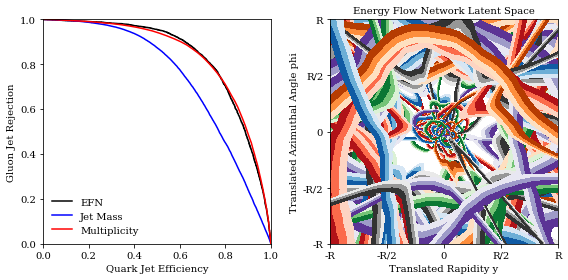

Model run number: 1
Model without bc
Loaded quark and gluon jets
Finished preprocessing
Done train/val/test split
Model summary:
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
phats_input (InputLayer)        [(None, None, 2)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    300         phats_input[0][0]                
__________________________________________________________________________________________________
activation_7 (Activation)       (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100    

In [ ]:
#  ______ ______ _   _
# |  ____|  ____| \ | |
# | |__  | |__  |  \| |
# |  __| |  __| | . ` |
# | |____| |    | |\  |
# |______|_|    |_| \_|
#  ________   __          __  __ _____  _      ______
# |  ____\ \ / /    /\   |  \/  |  __ \| |    |  ____|
# | |__   \ V /    /  \  | \  / | |__) | |    | |__
# |  __|   > <    / /\ \ | |\/| |  ___/| |    |  __|
# | |____ / . \  / ____ \| |  | | |    | |____| |____
# |______/_/ \_\/_/    \_\_|  |_|_|    |______|______|

# EnergyFlow - Python package for high-energy particle physics.
# Copyright (C) 2017-2020 Patrick T. Komiske III and Eric Metodiev

# standard library imports
from __future__ import absolute_import, division, print_function

# standard numerical library imports
import numpy as np

# energyflow imports
import energyflow as ef
from energyflow.archs import EFN
from energyflow.datasets import qg_jets
from energyflow.utils import data_split, to_categorical

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

################################### SETTINGS ##################################
# the commented values correspond to those in 1810.05165
###############################################################################

# data controls, can go up to 2000000 total for full dataset
train, val, test = 75000, 10000, 15000
#train, val, test = 500000, 100000, 100000
#train, val, test = 1000000, 200000, 200000

# network architecture parameters
#Phi_sizes, F_sizes = (100, 100, 128), (100, 100, 100)
Phi_sizes, F_sizes = (100, 100, 256), (100, 100, 100)

# network training parameters
num_epoch = 10
batch_size = 500

model_runs = 0
###############################################################################

while model_runs < 2:

  print('Model run number: {}'.format(model_runs))

  if model_runs == 0:
    bc_setup = True
    print('Model with bc')
  else:
    bc_setup = False
    print('Model without bc')

  # load data
  #X, y = qg_jets.load(train + val + test)
  X, y = qg_jets.load(num_data= (train + val + test), pad=True, ncol=4, generator='pythia',
                          with_bc = bc_setup, cache_dir='~/.energyflow')

  # ignore pid information
  X = X[:,:,:3]

  # convert labels to categorical
  Y = to_categorical(y, num_classes=2)

  print('Loaded quark and gluon jets')

  # preprocess by centering jets and normalizing pts
  for x in X:
      mask = x[:,0] > 0
      yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
      x[mask,1:3] -= yphi_avg
      x[mask,0] /= x[:,0].sum()

  print('Finished preprocessing')

  # do train/val/test split 
  (z_train, z_val, z_test, 
  p_train, p_val, p_test,
  Y_train, Y_val, Y_test) = data_split(X[:,:,0], X[:,:,1:], Y, val=val, test=test)

  print('Done train/val/test split')
  print('Model summary:')

  # build architecture
  efn = EFN(input_dim=2, Phi_sizes=Phi_sizes, F_sizes=F_sizes)

  # train model
  efn.fit([z_train, p_train], Y_train,
          epochs=num_epoch,
          batch_size=batch_size,
          validation_data=([z_val, p_val], Y_val),
          verbose=1)

  # get predictions on test data
  preds = efn.predict([z_test, p_test], batch_size=1000)

  # get ROC curve
  efn_fp, efn_tp, threshs = roc_curve(Y_test[:,1], preds[:,1])

  # get area under the ROC curve
  auc = roc_auc_score(Y_test[:,1], preds[:,1])
  print()
  print('EFN AUC:', auc)
  print()

  # some nicer plot settings 
  plt.rcParams['font.family'] = 'serif'
  plt.rcParams['figure.autolayout'] = True

  fig, axes = plt.subplots(1, 2, figsize=(8,4))

  ######################### ROC Curve Plot #########################

  # get multiplicity and mass for comparison
  masses = np.asarray([ef.ms_from_p4s(ef.p4s_from_ptyphims(x).sum(axis=0)) for x in X])
  mults = np.asarray([np.count_nonzero(x[:,0]) for x in X])
  mass_fp, mass_tp, threshs = roc_curve(Y[:,1], -masses)
  mult_fp, mult_tp, threshs = roc_curve(Y[:,1], -mults)

  # plot the ROC curves
  axes[0].plot(efn_tp, 1-efn_fp, '-', color='black', label='EFN')
  axes[0].plot(mass_tp, 1-mass_fp, '-', color='blue', label='Jet Mass')
  axes[0].plot(mult_tp, 1-mult_fp, '-', color='red', label='Multiplicity')

  # axes labels
  axes[0].set_xlabel('Quark Jet Efficiency')
  axes[0].set_ylabel('Gluon Jet Rejection')

  # axes limits
  axes[0].set_xlim(0, 1)
  axes[0].set_ylim(0, 1)

  # make legend and show plot
  axes[0].legend(loc='lower left', frameon=False)

  ######################### Filter Plot #########################

  # plot settings
  R, n = 0.4, 100
  colors = ['Reds', 'Oranges', 'Greens', 'Blues', 'Purples', 'Greys']
  grads = np.linspace(0.45, 0.55, 4)

  # evaluate filters
  X, Y, Z = efn.eval_filters(R, n=n)

  # plot filters
  for i,z in enumerate(Z):
      axes[1].contourf(X, Y, z/np.max(z), grads, cmap=colors[i%len(colors)])

  axes[1].set_xticks(np.linspace(-R, R, 5))
  axes[1].set_yticks(np.linspace(-R, R, 5))
  axes[1].set_xticklabels(['-R', '-R/2', '0', 'R/2', 'R'])
  axes[1].set_yticklabels(['-R', '-R/2', '0', 'R/2', 'R'])
  axes[1].set_xlabel('Translated Rapidity y')
  axes[1].set_ylabel('Translated Azimuthal Angle phi')
  axes[1].set_title('Energy Flow Network Latent Space', fontdict={'fontsize': 10})

  plt.show()

  model_runs += 1

In [ ]:
# |  __ \|  ____| \ | |
# | |__) | |__  |  \| |
# |  ___/|  __| | . ` |
# | |    | |    | |\  |
# |_|    |_|    |_| \_|
#  ________   __          __  __ _____  _      ______
# |  ____\ \ / /    /\   |  \/  |  __ \| |    |  ____|
# | |__   \ V /    /  \  | \  / | |__) | |    | |__
# |  __|   > <    / /\ \ | |\/| |  ___/| |    |  __|
# | |____ / . \  / ____ \| |  | | |    | |____| |____
# |______/_/ \_\/_/    \_\_|  |_|_|    |______|______|

# EnergyFlow - Python package for high-energy particle physics.
# Copyright (C) 2017-2020 Patrick T. Komiske III and Eric Metodiev

# standard library imports
from __future__ import absolute_import, division, print_function

# standard numerical library imports
import numpy as np

# energyflow imports
import energyflow as ef
from energyflow.archs import PFN
from energyflow.datasets import qg_jets
from energyflow.utils import data_split, remap_pids, to_categorical

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

################################### SETTINGS ###################################
# the commented values correspond to those in 1810.05165
###############################################################################

# data controls, can go up to 2000000 for full dataset
train, val, test = 75000, 10000, 15000
#train, val, test = 1000000, 200000, 200000
use_pids = True

# network architecture parameters
#Phi_sizes, F_sizes = (100, 100, 128), (100, 100, 100)
Phi_sizes, F_sizes = (100, 100, 256), (100, 100, 100)

# network training parameters
num_epoch = 10
batch_size = 500

model_runs = 0
###############################################################################

while model_runs < 2:

  print('Model run number: {}'.format(model_runs))

  if model_runs == 0:
    bc_setup = True
    print('Model with bc')
  else:
    bc_setup = False
    print('Model without bc')

  # load data
  #X, y = qg_jets.load(train + val + test)
  X, y = qg_jets.load(num_data= (train + val + test), pad=True, ncol=4, generator='pythia',
                          with_bc = bc_setup, cache_dir='~/.energyflow')

  # convert labels to categorical
  Y = to_categorical(y, num_classes=2)

  print('Loaded quark and gluon jets')

  # preprocess by centering jets and normalizing pts
  for x in X:
      mask = x[:,0] > 0
      yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
      x[mask,1:3] -= yphi_avg
      x[mask,0] /= x[:,0].sum()

  # handle particle id channel
  if use_pids:
      remap_pids(X, pid_i=3,error_on_unknown=False)
  else:
      X = X[:,:,:3]

  print('Finished preprocessing')

  # do train/val/test split 
  (X_train, X_val, X_test,
  Y_train, Y_val, Y_test) = data_split(X, Y, val=val, test=test)

  print('Done train/val/test split')
  print('Model summary:')

  # build architecture
  pfn = PFN(input_dim=X.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes)

  # train model
  pfn.fit(X_train, Y_train,
          epochs=num_epoch,
          batch_size=batch_size,
          validation_data=(X_val, Y_val),
          verbose=1)

  # get predictions on test data
  preds = pfn.predict(X_test, batch_size=1000)

  # get ROC curve
  pfn_fp, pfn_tp, threshs = roc_curve(Y_test[:,1], preds[:,1])

  # get area under the ROC curve
  auc = roc_auc_score(Y_test[:,1], preds[:,1])
  print()
  print('PFN AUC:', auc)
  print()

  # get multiplicity and mass for comparison
  masses = np.asarray([ef.ms_from_p4s(ef.p4s_from_ptyphims(x).sum(axis=0)) for x in X])
  mults = np.asarray([np.count_nonzero(x[:,0]) for x in X])
  mass_fp, mass_tp, threshs = roc_curve(Y[:,1], -masses)
  mult_fp, mult_tp, threshs = roc_curve(Y[:,1], -mults)

  # some nicer plot settings 
  plt.rcParams['figure.figsize'] = (4,4)
  plt.rcParams['font.family'] = 'serif'
  plt.rcParams['figure.autolayout'] = True

  # plot the ROC curves
  plt.plot(pfn_tp, 1-pfn_fp, '-', color='black', label='PFN')
  plt.plot(mass_tp, 1-mass_fp, '-', color='blue', label='Jet Mass')
  plt.plot(mult_tp, 1-mult_fp, '-', color='red', label='Multiplicity')

  # axes labels
  plt.xlabel('Quark Jet Efficiency')
  plt.ylabel('Gluon Jet Rejection')

  # axes limits
  plt.xlim(0, 1)
  plt.ylim(0, 1)

  # make legend and show plot
  plt.legend(loc='lower left', frameon=False)
  plt.show()

  model_runs += 1


# Evaluation Results of EFN and EPN
##Model parameters:

- Dataset:

  train, val, test = 1000000, 200000, 200000
- network architecture parameters:

  Phi_sizes, F_sizes = (100, 100, 256), (100, 100, 100)
- network training :

  num_epoch = 10
  batch_size = 500


# General

Due to Colab computation restriction only the half of the full dataset was used for training. It can be assumed that the AUC could increase with more data as well as will lead to less overfitting. 

##EFN:

The resulting AUC with bottom and charm quar2ks was: 

The ROC - curve results as:

The resulting AUC without bottom and charm quarks was: 

The ROC - curve results as:



#PFN:

The resulting AUC with bottom and charm quar2ks was:

The ROC - curve results as:

The resulting AUC without bottom and charm quarks was:

The ROC - curve results as:

-------------

The graph based NN models where choosen due to various research papers on jet classification in HEP (shown below) resulting in the Python package Energyflow. EnergyFlow  computes Energy Flow Polynomials (EFPs) as defined in Ref. [1], implements Energy Flow Networks (EFNs) and Particle Flow Networks (PFNs) as defined in Ref. [2], computes Energy Mover's Distances as defined in Ref. [3], and provides access to some particle physics datasets hosted on Zenodo including the jet datasets in MOD HDF5 format used in Ref. [4].

EFN and EPN are based on the GNN DeepSet and developed this approach further suited for HEP classification of particle jets [2].

Further considered graph based models for point clouds where SplineCNN and PointCNN (Metrics shown at the top of this notebook). Further HSP-SL (Hierarchical Graph Pooling with Structure Learning) for graph classification tasks was considered. 

-------




[1] P. T. Komiske, E. M. Metodiev, and J. Thaler, Energy Flow Polynomials: A complete linear basis for jet substructure, JHEP 04 (2018) 013 [1712.07124].

[2] P. T. Komiske, E. M. Metodiev, and J. Thaler, Energy Flow Networks: Deep Sets for Particle Jets, JHEP 01 (2019) 121 [1810.05165].

[3] P. T. Komiske, E. M. Metodiev, and J. Thaler, The Metric Space of Collider Events, Phys. Rev. Lett. 123 (2019) 041801 [1902.02346].

[4] P. T. Komiske, R. Mastandrea, E. M. Metodiev, P. Naik, and J. Thaler, Exploring the Space of Jets with CMS Open Data, Phys. Rev. D 101 (2020) 034009 [1908.08542].

[5] P. T. Komiske, E. M. Metodiev, and J. Thaler, Cutting Multiparticle Correlators Down to Size, Phys. Rev. D 101 (2020) 036019 [1911.04491].

[6] A. Andreassen, P. T. Komiske, E. M. Metodiev, B. Nachman, and J. Thaler, OmniFold: A Method to Simultaneously Unfold All Observables, Phys. Rev. Lett. 124 (2020) 182001 [1911.09107].

[7] P. T. Komiske, E. M. Metodiev, and J. Thaler, The Hidden Geometry of Particle Collisions, JHEP 07 (2020) 006 [2004.04159].

In [ ]:
"""An example involving Energy Flow Polynomials (EFPs) and a linear classifier
(Fisher's Linear Discriminant by default). First, the [`EFPSet`](../docs/
efp/#efpset) class is used to compute the EFPs up to the specified `dmax`, the
default being `dmax=5`. Then linear classifiers are trained for different
numbers of EFPs as input, determined by taking all EFPs up to degree `d` with
`d` from `1` to `dmax`. The output of the example is a plot of the ROC curves
for the classifiers with different numbers of EFP inputs.
"""

#  ______ ______ _____
# |  ____|  ____|  __ \
# | |__  | |__  | |__) |
# |  __| |  __| |  ___/
# | |____| |    | |
# |______|_|    |_|
#  ________   __          __  __ _____  _      ______
# |  ____\ \ / /    /\   |  \/  |  __ \| |    |  ____|
# | |__   \ V /    /  \  | \  / | |__) | |    | |__
# |  __|   > <    / /\ \ | |\/| |  ___/| |    |  __|
# | |____ / . \  / ____ \| |  | | |    | |____| |____
# |______/_/ \_\/_/    \_\_|  |_|_|    |______|______|

# EnergyFlow - Python package for high-energy particle physics.
# Copyright (C) 2017-2020 Patrick T. Komiske III and Eric Metodiev

# standard library imports
from __future__ import absolute_import, division, print_function

# standard numerical library imports
import numpy as np

# energyflow imports
import energyflow as ef
from energyflow.archs import LinearClassifier
from energyflow.datasets import qg_jets
from energyflow.utils import data_split, standardize, to_categorical

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

################################### SETTINGS ###################################

# data controls
num_data = 200000
test_frac = 0.2

# efp parameters
dmax = 5
measure = 'hadr'
beta = 0.5

# plotting
colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:blue']

################################################################################

# load data
X, y = qg_jets.load(num_data)

print('Loaded quark and gluon jets')

# calculate EFPs
print('Calculating d <= {} EFPs for {} jets... '.format(dmax, num_data), end='')
efpset = ef.EFPSet(('d<=', dmax), measure='hadr', beta=beta)
masked_X = [x[x[:,0] > 0] for x in X]
X = efpset.batch_compute(masked_X)
print('Done')

# train models with different numbers of EFPs as input
rocs = []
for d in range(1, dmax+1):

    # build architecture
    model = LinearClassifier(linclass_type='lda')

    # select EFPs with degree <= d
    X_d = X[:,efpset.sel(('d<=', d))]

    # do train/val/test split 
    (X_train, X_test, y_train, y_test) = data_split(X_d, y, val=0, test=test_frac)
    print('Done train/val/test split')

    # train model
    model.fit(X_train, y_train)

    # get predictions on test data
    preds = model.predict(X_test)

    # get ROC curve if we have sklearn
    if roc_curve:
        rocs.append(roc_curve(y_test, preds[:,1]))

        # get area under the ROC curve
        auc = roc_auc_score(y_test, preds[:,1])
        print()
        print('EFPs d <= {} AUC:'.format(d), auc)
        print()

# some nicer plot settings 
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True

# iterate over the ROC curves and plot them
for i,d in enumerate(range(1, dmax+1)):
    plt.plot(rocs[i][1], 1-rocs[i][0], '-', color=colors[i], 
                                            label='LDA: d <= {} EFPs'.format(d))

# axes labels
plt.xlabel('Quark Jet Efficiency')
plt.ylabel('Gluon Jet Rejection')

# axes limits
plt.xlim(0, 1)
plt.ylim(0, 1)

# make legend and show plot
plt.legend(loc='lower left', frameon=False)
plt.show()


In [ ]:
## Datset path
path_data_with_bc = '/content/gdrive/MyDrive/QML_HEP_eval_CH/04_GNN/Dataset/incl_bottom_charm_bc'
path_data_no_bc   = '/content/gdrive/MyDrive/QML_HEP_eval_CH/04_GNN/Dataset/no_bottom_charm_bc'

In [ ]:
os.chdir(ROOT_DIR)

In [ ]:
from google.colab import drive
drive.mount('/{}/gdrive'.format(ROOT_DIR),force_remount=True)
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive


In [ ]:
os.chdir(path_data_with_bc)

data_incl_bc = np.load(path_data_with_bc + '/QG_jets_withbc_0.npz')


list_incl_bc = data_incl_bc.files

print(len(lst_incl_bc))
print(lst_incl_bc)


for item in lst_incl_bc:
  print(item)

  #print(len(data_incl_bc[item]))
  #print(data_incl_bc[item])
